EXAMPLE 5.9.6.
=====
Hydrodynamic Bearings. Repeat the analysis of Example 5.9.1
when the bearings are replaced with hydrodynamic bearings. The oil-film bearings have a diameter of 100 mm, are 30 mm long, and each supports a static load
of 525 N, which represents half of the weight of the rotor. The radial clearance in
the bearings is 0.1 mm and the oil film has a viscosity of 0.1 Pa s. These bearings
have the same characteristics as Example 5.5.1.


In [9]:
from bokeh.io import output_notebook
import ross as rs
import numpy as np
output_notebook()

Loading BokehJS ...

(Figure(id='4762', ...),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0f91e285c0>)

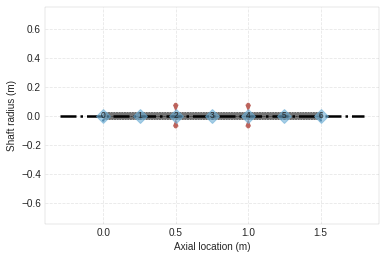

In [10]:

#Classic Instantiation of the rotor
shaft_elements = []
bearing_seal_elements = []
disk_elements = []
Steel = rs.steel
for i in range(6):
    shaft_elements.append(rs.ShaftElement(L=0.25, material=Steel, n=i, i_d=0, o_d=0.05))

disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=4,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=12.81e6,kxy=16.39e6,kyx=-25.06e6, kyy=8.815e6, cxx=232.9e3,cxy=-81.92e3,cyx=-81.92e3, cyy=294.9e3))
bearing_seal_elements.append(rs.BearingElement(n=6, kxx=12.81e6,kxy=16.39e6,kyx=-25.06e6, kyy=8.815e6, cxx=232.9e3,cxy=-81.92e3,cyx=-81.92e3, cyy=294.9e3))

rotor596c = rs.Rotor(shaft_elements=shaft_elements,
                     bearing_seal_elements=bearing_seal_elements,
                     disk_elements=disk_elements,n_eigen = 12)

rotor596c.plot_rotor()

(Figure(id='6266', ...),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0f91ce1358>)

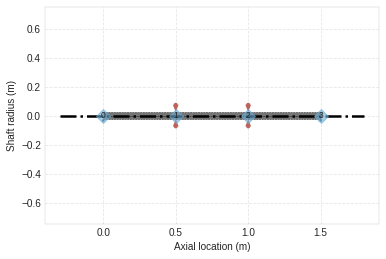

In [11]:
#From_section class method instantiation.
bearing_seal_elements = []
disk_elements = []
shaft_length_data = 3*[0.5]
i_d = 3*[0]
o_d = 3*[0.05]

disk_elements.append(rs.DiskElement.from_geometry(n=1,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=1e6, cxx=3e3, cyy=3e3))
bearing_seal_elements.append(rs.BearingElement(n=3, kxx=1e6, kyy=1e6, cxx=3e3, cyy=3e3))

rotor596fs = rs.Rotor.from_section(brg_seal_data=bearing_seal_elements,
                                   disk_data=disk_elements,leng_data=shaft_length_data,
                                   i_ds_data=i_d,o_ds_data=o_d
                                  )
rotor596fs.plot_rotor()


In [12]:
#Obtaining results for w = 200 rpm 
rotor596c.w=200*np.pi/30
rotor596fs.w=200*np.pi/30



print('Normal Instantiation =', rotor596c.wn/(2*np.pi),'[Hz]')
print('\n')
print('From Section Instantiation =', rotor596fs.wn/(2*np.pi),'[Hz]')

Normal Instantiation = [14.65456496 15.00342392 17.29602598 17.6304386  69.39050339 69.45679729] [Hz]


From Section Instantiation = [ 13.89569397  13.9153662   47.97597062  48.40830101 136.87265681
 135.61510191] [Hz]


In [13]:
#Obtaining results for w=4000RPM 

rotor596c.w=4000*np.pi/30


print('Normal Instantiation =', rotor596c.wn/(2*np.pi))

Normal Instantiation = [14.65397309 15.00828414 17.08915063 17.78723718 67.06556436 71.29745535]
